In [729]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
import cPickle
import numpy.polynomial.legendre as legendre

In [746]:
two_pi = 2 * np.pi
cos = np.cos

In [747]:
destination_folder = "/Users/lmatayoshi/Desktop/plots_comparativos/"

In [795]:
def generate_with_whitelist(n_points, whitelist):
    xs, ys = compute_dct_points(n_points, whitelist)
    coefficients = calculate_coefficients(ys)
    new_xs, new_ys = compute_cosine_dct(coefficients)
    base_xs, base_ys = compute_cosine(n_points, whitelist)
    plot(xs, ys, new_xs, new_ys, base_xs, base_ys)
    print "xs: "
    print xs
    print "ys: "
    print ys
    print "\n"
    print "Coefficients: "
    print coefficients

In [796]:
def generate(n_points):
    whitelist = range(1, n_points)
    generate_with_whitelist(n_points, whitelist)

In [797]:
def compute_cosine_dct(coefficients):
    n = len(coefficients)
    xs = np.linspace(0, 1, 100)
    ys = []
    for t in xs:
        #acum = 0
        acum = coefficients[0]
        for i in range(1, n):
            acum += coefficients[i] * cos(two_pi * i * t)
        ys.append(acum/len(coefficients))
    return xs, ys

In [880]:
def compute_cosine(n, whitelist):
    xs = np.linspace(0, 1, 100)
    ys = []
    for t in xs:
        acum = 0
        for i in range(1,n):
            if i in whitelist:
                acum += cos(two_pi*i*t)
                #acum += cos((two_pi / (2. * n))*i*(t+0.5))
        ys.append(acum)
    return xs, ys

In [881]:
def compute_dct_points(n, whitelist):
    xs = []
    for i in range(n):
        xs.append((float(i)/float(n)))
    ys = []
    for t in xs:
        acum = 0
        for f in range(1,n):
            if f in whitelist:
                acum += cos(two_pi * f * t)
        ys.append(acum)
    return xs, ys

In [882]:
def calculate_coefficients(ys):
    return dct(ys, norm="ortho")

In [883]:
def plot(xs, ys, new_xs, new_ys, base_xs, base_ys):
    sns.set(style="whitegrid")
    plt.plot(xs, ys, marker="o", linestyle="None", color="black")
    plt.plot(base_xs, base_ys, color="black", label="Baseline", linestyle = "--")
    plt.plot(new_xs, new_ys, color="blue", label="Computed")
    plt.legend()
    plt.show()

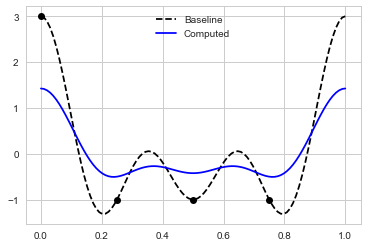

xs: 
[0.0, 0.25, 0.5, 0.75]
ys: 
[3.0, -1.0, -1.0, -0.99999999999999967]


Coefficients: 
[  2.22044605e-16   2.61312593e+00   2.00000000e+00   1.08239220e+00]


In [886]:
generate_with_whitelist(4, [1, 2, 3])

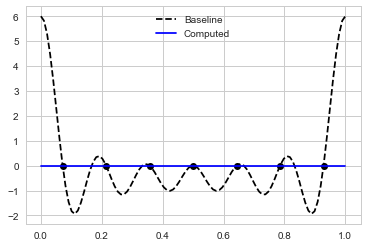

xs: 
[0.07142857142857142, 0.21428571428571427, 0.35714285714285715, 0.5, 0.6428571428571429, 0.7857142857142857, 0.9285714285714286]
ys: 
[4.4408920985006262e-16, 2.4980018054066022e-16, 3.3306690738754696e-16, 0.0, 3.3306690738754696e-15, -7.4940054162198066e-16, -3.4416913763379853e-15]


Coefficients: 
[  6.29437291e-17   1.74732818e-15  -2.72404406e-15   2.95427085e-15
  -1.19418094e-15  -8.72229197e-16   1.57437106e-15]


In [857]:
generate(7)

# Legendre (grados 1 a 3)

In [88]:
def l0(x):
    return 1

In [15]:
def l1(x):
    return x

In [16]:
def l2(x):
    return (3*(x**2)-1) * 0.5

In [17]:
def l3(x):
    return (5*(x**3) - 3*x) * 0.5

In [18]:
def l4(x):
    return (35*(x**4) - 30*(x**2) + 3) * 0.125

In [394]:
def l5(x):
    return (63*(x**5) - 70*(x**3) + 15*x) * 0.125

In [687]:
xs = np.linspace(-1, 1, 100)

In [688]:
ys_l0 = [l0(x) for x in xs]
ys_l1 = [l1(x) for x in xs]
ys_l2 = [l2(x) for x in xs]
ys_l3 = [l3(x) for x in xs]
ys_l4 = [l4(x) for x in xs]

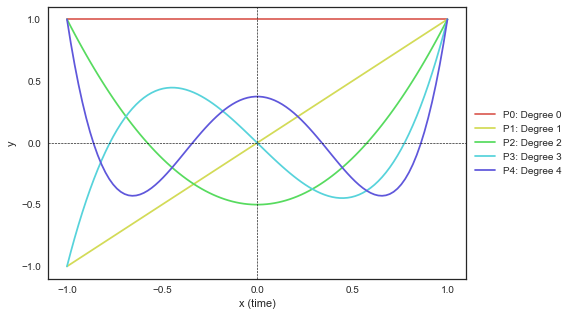

In [728]:
sns.set(style="white", palette="hls")

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

ax.plot(xs, ys_l0, label="P0: Degree 0")
ax.plot(xs, ys_l1, label="P1: Degree 1")
ax.plot(xs, ys_l2, label="P2: Degree 2")
ax.plot(xs, ys_l3, label="P3: Degree 3")
ax.plot(xs, ys_l4, label="P4: Degree 4")
ax.axvline(x=0, linestyle="--", color="black", linewidth=0.6)
ax.axhline(y=0, linestyle="--", color="black", linewidth=0.6)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1., 0.5))
plt.xticks([-1,-0.5, 0, 0.5, 1])
plt.yticks([-1,-0.5, 0, 0.5, 1])
plt.xlabel("x (time)")
plt.ylabel("y")
plt.savefig(destination_folder + "legendre")
plt.show()

In [726]:
sns.color_palette("BuGn_r")

[(0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.17139561707035755, 0.58492887351018841, 0.3263514033064206),
 (0.31578623606305267, 0.71526336024605919, 0.5384390618992696),
 (0.51607843137254905, 0.81085736255286422, 0.72735101883890807),
 (0.74196078431372547, 0.90272971933871593, 0.86895809304113802),
 (0.8853517877739332, 0.95621683967704729, 0.96682814302191467)]

# DCT (grados 1 a 3)

In [24]:
def dct_1(x):
    return cos(two_pi * x)

In [25]:
def dct_2(x):
    return cos(two_pi * 2 * x)

In [26]:
def dct_3(x):
    return cos(two_pi * 3 * x)

In [27]:
xs = np.linspace(-1, 1, 100)

In [887]:
ys_dct_1 = [dct_1(x) for x in xs]
ys_dct_2 = [dct_2(x) for x in xs]
ys_dct_3 = [dct_3(x) for x in xs]

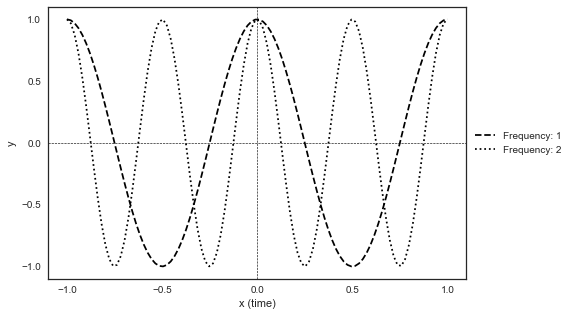

In [893]:
sns.set(style="white")

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

plt.plot(xs, ys_dct_1, label="Frequency: 1", color="black", linestyle="--")
plt.plot(xs, ys_dct_2, label="Frequency: 2", color="black", linestyle=":")
#plt.plot(xs, ys_dct_3, label="f=3Hz", color="black", linestyle=":")

ax.axvline(x=0, linestyle="--", color="black", linewidth=0.6)
ax.axhline(y=0, linestyle="--", color="black", linewidth=0.6)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([-1,-0.5, 0, 0.5, 1])
plt.yticks([-1,-0.5, 0, 0.5, 1])
plt.xlabel("x (time)")
plt.ylabel("y")

plt.savefig(destination_folder + "dct")
plt.show()

# Real instances

In [124]:
base_dir = "/Users/lmatayoshi/Desktop/instances_i/"
instances = ["d0hn500n", "d0vn600j", "d0xn600m", "d1uc3000", "d29n500c", "d2mc3000", "d2mc3002", "d2mc300x", "d41c3000", "d41c3001"]
instances_dict = {}

In [125]:
for instance in instances:
    filename = base_dir + instance
    with open(filename, "rb") as f:
        feats = cPickle.load(f)
        instances_dict[instance] = feats

Instancia seleccionada: 'd0vn600j', MFCC 4

In [597]:
#feats = instances_dict["d0vn600j"]
#n_mfcc = 4
#print feats.shape
#ts = np.linspace(-1, 1, feats.shape[0])
#ys = feats[:, n_mfcc]

(23, 39)


# Main Comparison

Generate 3 plots, comparing:

Legendre Degree 1 - DCT 2 coefficients

Legendre Degree 2 - DCT 3 coefficients

Legendre Degree 4 - DCT 5 coefficients

In [650]:
feats = instances_dict["d0vn600j"]
n_mfcc = 4
print feats.shape
ts = np.linspace(-1, 1, feats.shape[0])
ys = feats[:, n_mfcc]

(23, 39)


In [711]:
n_coefficients = [1, 2, 3, 5]
#n_coefficients = [1]

In [712]:
"my {0} string: {1}".format("cool", "Hello there!")

'my cool string: Hello there!'

In [713]:
def plot_main(ts, ys, legendre_ys, dct_ys, n):
    filename = destination_folder + str(n)
    sns.set(style="whitegrid", palette="dark")
    plt.plot(ts, ys, color="black", linewidth= 0.9, label="original values")
    plt.plot(ts, legendre_ys, linestyle="--", linewidth=1.3, label="legendre approx.")
    plt.plot(ts, dct_ys, linestyle="--", linewidth=1.3, label="dct approx.")
    plt.xlabel("Normalized time")
    plt.ylabel("MFCC value")
    plt.title("4th MFCC of phone instance 'i' with {0} coefficients".format(n))
    plt.legend()
    plt.savefig(filename)
    plt.show()

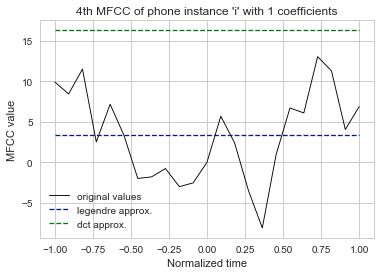

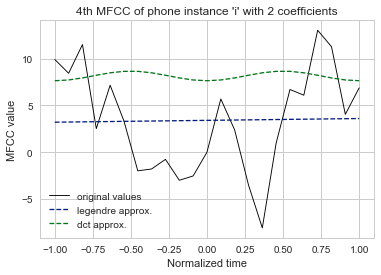

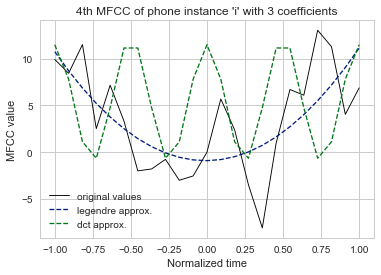

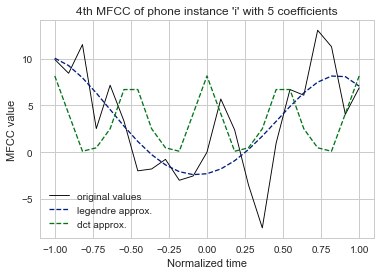

In [718]:
for n in n_coefficients:
    coeffs = legendre.legfit(ts, ys, n-1)
    legendre_ys = compute_from_coeffs(coeffs, ts)
    dct_coeffs = dct(ys, norm="ortho")
    dct_ys = compute_cosine_dct(ts, dct_coeffs[0:n])
    plot_main(ts, ys, legendre_ys, dct_ys, n)

## Legendre

In [397]:
polynomials = [l0, l1, l2, l3, l4, l5]

In [398]:
def compute_from_coeffs(coeffs, ts):
    res = np.zeros(len(ts))
    for i in range(len(coeffs)):
        res += coeffs[i] * polynomials[i](ts)
    return res

In [624]:
coeffs = legendre.legfit(ts, ys, 5)
computed_ys = compute_from_coeffs(coeffs, ts)

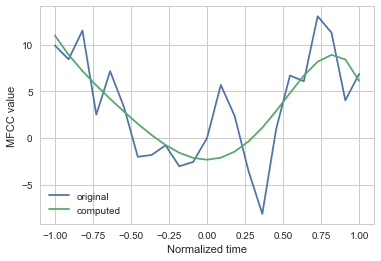

In [627]:
sns.set(style="whitegrid")
plt.plot(ts, ys, label="original")
plt.plot(ts, computed_ys, label="computed")
plt.xlabel("Normalized time")
plt.ylabel("MFCC value")
plt.legend()
plt.show()

## DCT

In [603]:
n_mfcc = 4

In [604]:
feats = instances_dict["d0vn600j"]
ts = np.linspace(-1, 1, feats.shape[0])
ys = feats[:, n_mfcc]

In [649]:
def compute_cosine_dct(ts, coefficients):
    n = len(coefficients)
    #xs = np.linspace(-1, 1, 100)
    ys = []
    for t in ts:
        acum = coefficients[0]
        #acum = 0
        for i in range(1, n):
            acum += coefficients[i] * cos(two_pi * i * t)
        ys.append(acum/len(coefficients))
    #return xs, ys
    return ys

In [606]:
dct_coeffs = dct(ys, norm="ortho")

In [613]:
#dct_ts, dct_ys = compute_cosine_dct(dct_coeffs[0:1])
dct_ts, dct_ys = compute_cosine_dct(dct_coeffs[0:5])

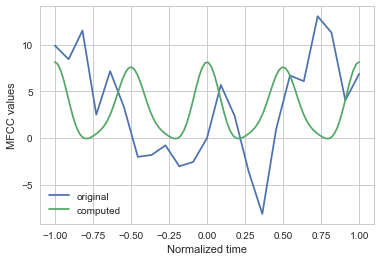

In [614]:
sns.set(style="whitegrid")
plt.plot(ts, ys, label="original")
plt.plot(dct_ts, dct_ys, label="computed")
plt.xlabel("Normalized time")
plt.ylabel("MFCC values")
plt.legend()
plt.show()